### Introducing even more variance

* random customer ages

### Bias Variance Tradeoff

In [6]:
from sklearn.linear_model import LinearRegression
from data import input_temps, temps_and_is_weekends, temps_weekends_and_ages, customers_with_errors
feature_datasets = [input_temps, temps_and_is_weekends, temps_weekends_and_ages]
models = []
for dataset in feature_datasets:
    model = LinearRegression()
    model.fit(dataset, customers_with_errors)
    models.append(model)
models

intercepts = [model.intercept_ for model in models]
# [35.62031572335471, 9.854773197812762, 12.155548281106803]

coefs = [model.coef_ for model in models]
coefs

[array([2.87988515]),
 array([ 3.07299452, 38.61313304]),
 array([ 3.07698899, 38.62306381, -0.05584566])]

### Evaluate each of them 

In [9]:
# list(zip(models, feature_datasets))

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt

[sqrt(mean_squared_error(customers_with_errors ,model.predict(dataset))) for model, dataset in zip(models, feature_datasets)]


[27.945349336535738, 21.565735597602885, 21.556603670493452]

* Training vs holdouts

In [10]:
dataset.shape

(50, 3)

In [11]:
updated_models = []
for dataset in feature_datasets:
    model = LinearRegression()
    model.fit(dataset[:30], customers_with_errors[:30])
    updated_models.append(model)
updated_models

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False)]

In [15]:
from math import sqrt
from sklearn.metrics import mean_squared_error

training_errors = [sqrt(mean_squared_error(customers_with_errors[0:30],model.predict(dataset[0:30]))) for model, dataset in zip(updated_models, feature_datasets)]
training_errors

[28.123394526498657, 20.233133908472176, 19.11337786070657]

In [ ]:
customer

In [17]:
holdout_errors = [sqrt(mean_squared_error(customers_with_errors[30:],model.predict(dataset[30:]))) for model, dataset in zip(updated_models, feature_datasets)]
holdout_errors


[27.73131229156565, 24.182266312981024, 28.926874485322074]

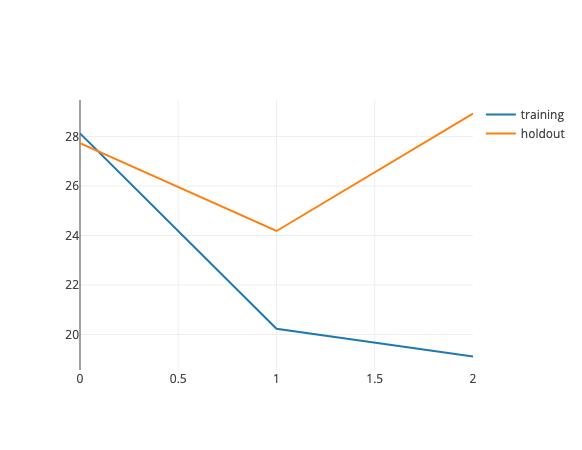

In [18]:
from graph import trace_values, plot
training_errors_trace = trace_values([0, 1, 2], training_errors, mode = 'lines',name= 'training')
holdout_errors_trace = trace_values([0, 1, 2], holdout_errors, mode = 'lines', name='holdout')
plot([training_errors_trace, holdout_errors_trace])

In [19]:
from sklearn.model_selection import train_test_split

In [ ]:
LinearRegression()
